In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from src.ising.training.train_dnn import train_dnn
import h5py
import os
import numpy as np
import seaborn as sns
# In a code cell at the top of your notebook
from src.ising.plotting.plotting import plot_g0_testing

In [13]:


# Load data (example for G0)
data_path = os.path.join('..', 'src', 'ising', 'data', 'G0_data.h5py')
f5 = h5py.File(data_path, 'r')
Ts_G_0 = f5['Ts'][:]
Targs = np.arange(61)
xiBs = f5['xiBs'][:]
factor = 0.30
cut = np.amax(xiBs) * factor
labels_tmp = np.heaviside(xiBs[Targs] - cut, 1.0)
data_train = f5['arrs'][Targs, :8000, :].reshape(Targs.shape[0]*8000, 1600)
data_validate=f5['arrs'][Targs,8000:,:]

labels_train = np.repeat(labels_tmp, 8000)
data_train = torch.tensor(data_train, dtype=torch.float32)
labels_train = torch.tensor(labels_train, dtype=torch.float32)

In [11]:

# Import train_dnn
from src.ising.training.train_dnn import train_dnn

# Train the model (adjust parameters as needed)
model, losses = train_dnn(
    data_train,
    labels_train,
    depth=4,
    epochs=10,
    lr=5e-6,
    batch_size=150,
    data_validate= None,
    labels_validate=None,
    is_ab=False,
    is_shuffling=False,
    shuffle_injection_frequency=50,
    print_every=1000,
    factor=0.3,
    class_balance=0.5,
    verbose=True
)


Epoch 1/10, Loss: 0.5992
Epoch 2/10, Loss: 0.4967
Epoch 3/10, Loss: 0.3523
Epoch 4/10, Loss: 0.3101
Epoch 5/10, Loss: 0.2952
Epoch 6/10, Loss: 0.2852
Epoch 7/10, Loss: 0.2789
Epoch 8/10, Loss: 0.2734
Epoch 9/10, Loss: 0.2694
Epoch 10/10, Loss: 0.2657


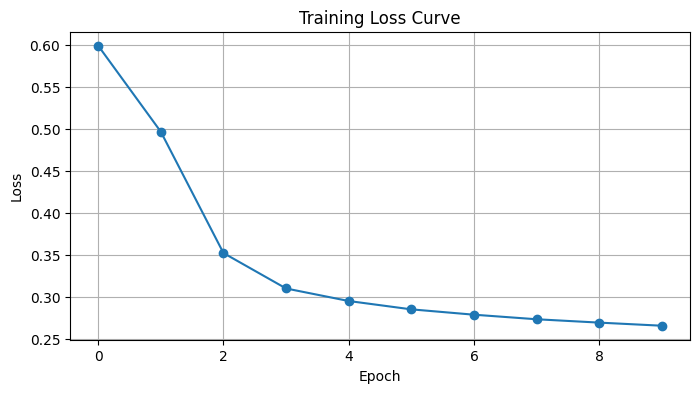

In [12]:
# Plot the training loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(losses, marker='o')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

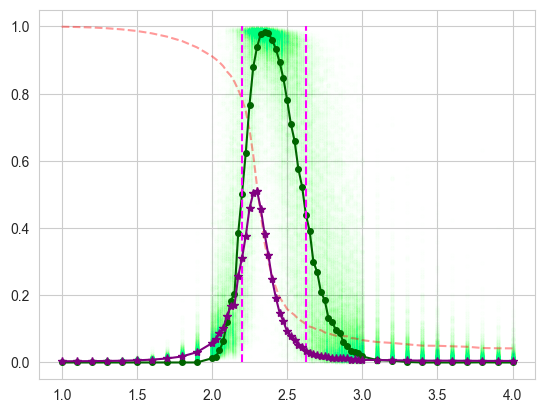

In [26]:
#Plot the output
outputs=[]
outputs_01=[]
outputs2=[]
model.eval()
with torch.no_grad():
    for i in torch.arange(Targs.shape[0]):
        d=data_validate[i,:,:]
        output=model(torch.tensor(d,dtype=torch.float32))
        output_01=(output>0.5)
        outputs_01.append(output_01.squeeze().detach().cpu().numpy())
        shfl=np.random.permutation(np.arange(1600))
        output2=model(torch.tensor(d[:,shfl],dtype=torch.float32))
        outputs.append(output.squeeze().detach().cpu().numpy())
        outputs2.append(output2.squeeze().detach().cpu().numpy())
    
#plt.plot(outputs.squeeze(),"o",alpha=0.02,color='red')
#plt.plot(labels_validate)
#depth=6
sns.set_style("whitegrid")
mu=np.average(np.fabs(np.average(data_validate[:,:2000,:],axis=2)),axis=1)
outputs=np.array(outputs)
outputs2=np.array(outputs2)
Tsn=Ts_G_0[Targs]
ax=plt.axes()

ax.scatter(np.repeat(Tsn,2000),np.concatenate(outputs),alpha=0.002,s=8.0,color='springgreen')

#plt.plot(Tsn,labels_tmp,"g.--")
ax.plot(Tsn,mu,"r--",alpha=0.4,label="\mu")
#plt.plot(Tsn,np.average(outputs,axis=1),"o-",markersize=4,color='darkgreen')
ax.plot(Tsn,np.average(outputs_01,axis=1),"o-",markersize=4,color='darkgreen',label='Model output')
T0,T1=Tsn[np.where(labels_tmp==1.0)[0][[0,-1]]]
ax.vlines(T0,0,1,color='magenta',linestyle='dashed')
ax.vlines(T1,0,1,color='magenta',linestyle='dashed')
ax.plot(Tsn,np.average(outputs2,axis=1),"*-",color='purple',label='Model output shuffled')
#plt.plot(Ts,probs)
# ax.plot(Tc,mu_avc,"r",alpha=0.4) # Ask Pallab - what is mu_avc

#plt.legend(loc="upper right")/
handles, labels = ax.get_legend_handles_labels()
#plt.savefig("%s_testdata_g0.pdf"%(sfname[:-4]),dpi=300)

In [ ]:
#Define NN and training parameters

depth=4
net=VDNN(depth)
loss_fn = nn.BCELoss(reduction='none')
count=0

#-------------------------------------------
#No of epochs during training
optim_step=500
#-------------------------------------------

losses=[]

NN_test=Targs.shape[0]*8000

model_type=type(net).__name__

In [ ]:
#scheduler
lr=5e-6

optimizer = optim.Adam(net.parameters(),lr=lr,weight_decay=0)
scheduler = ReduceLROnPlateau(optimizer,"min",patience=5)
from collections import deque
osfnames=deque()